In [1]:
import sys
sys.path.append("../../../")

from context_exploration.model.loader import get_run_directory, load_config
from context_exploration.data.envs import make_env
from context_exploration.evaluation.process_calibration import plot_calibration_results

from IPython import display
import pickle as pkl
from pathlib import Path
import pandas as pd
import seaborn as sns
import numpy as np


import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
mpl.rcParams.update({'font.size': 12})

fig_scale = 1.8

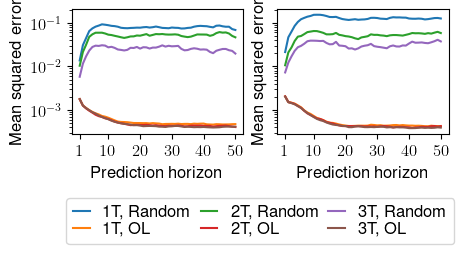

In [2]:
def runs_for_asq(env_name):
    RUN_LIST = [f"cr_s{s}_{env_name}_posweights_relu_npklw5" for s in [1, 2, 3]]

    runs = [
        {
            "id_list": RUN_LIST,
            "label": "1T",
            "plot_opts": {"linestyle": "--"},
            "criterion": "neg-entropy",
            "checkpoint_step": "50000_best",
            "rollout_length": 1,
            "cem_planning_horizon": 20,
            "n_env_inits": 1,
            "has_mpc": False,
            "has_minmax": False
        },
        {
            "id_list": RUN_LIST,
            "label": "2T",
            "plot_opts": {"linestyle": "--"},
            "criterion": "neg-entropy",
            "checkpoint_step": "50000_best",
            "rollout_length": 2,
            "cem_planning_horizon": 20,
            "n_env_inits": 1,
            "has_mpc": False,
            "has_minmax": False
        },
        {
            "id_list": RUN_LIST,
            "label": "3T",
            "plot_opts": {"linestyle": "--"},
            "criterion": "neg-entropy",
            "checkpoint_step": "50000_best",
            "rollout_length": 3,
            "cem_planning_horizon": 20,
            "n_env_inits": 1,
            "has_mpc": False,
            "has_minmax": False
        },
    ]
    return runs

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5.4 * 0.5 * fig_scale, 0.9 * fig_scale), sharey=True)

plot_calibration_results(runs_for_asq("asq1"), fig_scale=fig_scale, aggregation="mean", legend=False, 
                         legend_kwargs={}, ax=ax[0])
plot_calibration_results(runs_for_asq("asq2"), fig_scale=fig_scale, aggregation="mean", legend=True, 
                         legend_kwargs={"ncol": 3, "loc": "center", "bbox_to_anchor": (-0.1, -0.7)},
                         ax=ax[1])
plt.savefig("generated/toy_problem_random_vs_mpc_results.pdf", bbox_inches="tight")